# Step 10: Study Advanced units.

In this notebook we look at how some of the approaches from the advanced units can help. In particular we explore the **Advanced Deep Learning** section. 

## Setup

Let's start by loading in our dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorboard.plugins.hparams import api as hp

In [2]:
import pathlib
import os.path

data_dir =  pathlib.Path(os.path.abspath("images/Flowers5/"))
data_dir

WindowsPath('E:/school/UCSD-ML-Capstone/images/Flowers5')

In [3]:
batch_size = 32
epochs=25
img_height = 192
img_width = 192

In [4]:
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.2, subset="both", seed=123,
                                                               image_size=(img_height, img_width), batch_size=batch_size)

Found 1857 files belonging to 5 classes.
Using 1486 files for training.
Using 371 files for validation.


In [5]:
class_names = train_ds.class_names
num_classes = len(class_names)
num_classes
print(class_names)

['Calceolaria', 'Daffodil', 'Freesia', 'Hibiscus', 'Iris']


In [6]:
model_url = 'https://tfhub.dev/google/bit/s-r50x1/1'
base_model = hub.KerasLayer(model_url)

## Transfer Learning

I found transfer learning to be very useful in improving my model. To revisit that let's see how big of a difference it can make.

In [14]:
model_without_transfer = tf.keras.Sequential([
    layers.Rescaling(1./255),
        layers.Conv2D(16, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Dropout(0.2),
        layers.Flatten(),
        layers.Dense(32, activation='relu'),
        layers.Dense(num_classes),
])

model_without_transfer.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


model_with_transfer = tf.keras.Sequential([
    layers.Rescaling(1./255),
    base_model,
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(len(train_ds.class_names)),
])
model_with_transfer.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [16]:
history_without_transfer = model_without_transfer.fit(train_ds, validation_data=val_ds, epochs=25, verbose=1)

Epoch 1/25
47/47 [==============================] - 19s 389ms/step - loss: 1.4597 - accuracy: 0.4112 - val_loss: 1.1722 - val_accuracy: 0.5256
Epoch 2/25
47/47 [==============================] - 18s 387ms/step - loss: 1.0170 - accuracy: 0.6070 - val_loss: 0.9249 - val_accuracy: 0.6604
Epoch 3/25
47/47 [==============================] - 18s 387ms/step - loss: 0.8040 - accuracy: 0.7153 - val_loss: 0.8032 - val_accuracy: 0.6981
Epoch 4/25
47/47 [==============================] - 18s 390ms/step - loss: 0.6018 - accuracy: 0.7968 - val_loss: 0.7361 - val_accuracy: 0.7305
Epoch 5/25
47/47 [==============================] - 18s 391ms/step - loss: 0.4408 - accuracy: 0.8526 - val_loss: 0.5819 - val_accuracy: 0.7736
Epoch 6/25
47/47 [==============================] - 18s 391ms/step - loss: 0.2842 - accuracy: 0.9092 - val_loss: 0.5066 - val_accuracy: 0.8248
Epoch 7/25
47/47 [==============================] - 18s 391ms/step - loss: 0.1607 - accuracy: 0.9556 - val_loss: 0.5606 - val_accuracy: 0.8464

In [15]:
history_with_transfer = model_with_transfer.fit(train_ds, validation_data=val_ds, epochs=25, verbose=1)

Epoch 1/25
47/47 [==============================] - 133s 3s/step - loss: 0.7938 - accuracy: 0.7052 - val_loss: 0.3865 - val_accuracy: 0.8868
Epoch 2/25
47/47 [==============================] - 122s 3s/step - loss: 0.3641 - accuracy: 0.8809 - val_loss: 0.2926 - val_accuracy: 0.9030
Epoch 3/25
47/47 [==============================] - 110s 2s/step - loss: 0.2701 - accuracy: 0.9098 - val_loss: 0.2530 - val_accuracy: 0.9164
Epoch 4/25
47/47 [==============================] - 110s 2s/step - loss: 0.1985 - accuracy: 0.9361 - val_loss: 0.2240 - val_accuracy: 0.9272
Epoch 5/25
47/47 [==============================] - 110s 2s/step - loss: 0.1633 - accuracy: 0.9529 - val_loss: 0.1916 - val_accuracy: 0.9326
Epoch 6/25
47/47 [==============================] - 110s 2s/step - loss: 0.1237 - accuracy: 0.9650 - val_loss: 0.1660 - val_accuracy: 0.9461
Epoch 7/25
47/47 [==============================] - 110s 2s/step - loss: 0.0869 - accuracy: 0.9812 - val_loss: 0.1567 - val_accuracy: 0.9488
Epoch 8/25
47

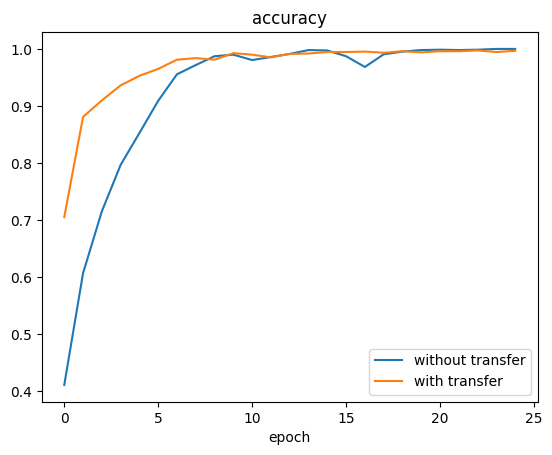

In [19]:
plt.plot(history_without_transfer.history['accuracy'], label = 'without transfer')
plt.plot(history_with_transfer.history['accuracy'], label = 'with transfer')
plt.xlabel('epoch')
plt.legend()
plt.title('accuracy')
plt.show()

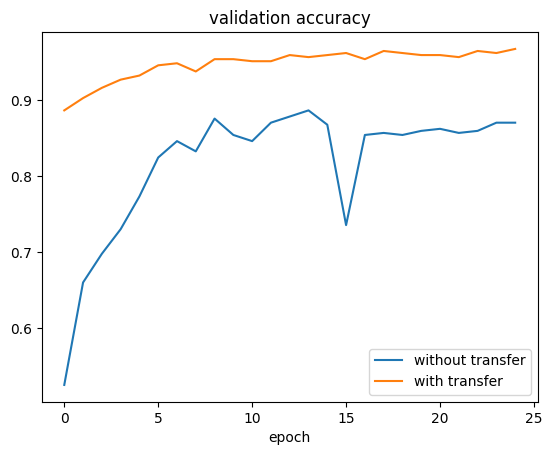

In [20]:
plt.plot(history_without_transfer.history['val_accuracy'], label = 'without transfer')
plt.plot(history_with_transfer.history['val_accuracy'], label = 'with transfer')
plt.xlabel('epoch')
plt.legend()
plt.title('validation accuracy')
plt.show()

### Results

Transfer learning made it a lot easier to learn, and the model was far less biased.

## Hyper-tuning